# Model Comparisons 

In [1]:
import os 
import pandas as pd

# get models 
models_names = [item for item in os.listdir() if os.path.isdir(item)]

# get bios 
bios_id = "BioS73"

In [2]:
#models_names.remove('nucleotide-transformer-2.5b-multi-species')

In [3]:
models_names

['DNABERT-2-117M',
 'Geneformer',
 'gena-lm-bert-base-t2t',
 'gena-lm-bert-large-t2t',
 'gena-lm-bigbird-base-t2t',
 'hyenadna-large-1m-seqlen-hf',
 'hyenadna-medium-160k-seqlen-hf',
 'hyenadna-medium-450k-seqlen-hf',
 'hyenadna-small-32k-seqlen-hf',
 'nucleotide-transformer-2.5b-1000g',
 'nucleotide-transformer-2.5b-multi-species',
 'nucleotide-transformer-500m-1000g',
 'nucleotide-transformer-500m-human-ref']

## auc and AUC

In [4]:
# get from DNABERT 2 and NT

def get_prcs_aucs(models_names, bios_id): 
    prc_s = []
    auc_s = []
    for model_name in models_names:
        file_path = os.path.join(os.getcwd(), model_name, bios_id) 
        print(model_name)
        # Open the file in read mode
        with open(os.path.join(file_path, "prc.txt"), "r") as file:
            # Read the content of the file
            content = file.read()

        # Extract the value after "PRC: "
        prc_s.append(float(content.split("PRC: ")[1].strip()))

        # Open the file in read mode
        with open(os.path.join(file_path, "auc.txt"), "r") as file:
            # Read the content of the file
            content = file.read()

        # Extract the value after "PRC: "
        auc_s.append(float(content.split("AUC: ")[1].strip()))

    return prc_s, auc_s

prc_s, auc_s = get_prcs_aucs(models_names, bios_id)

DNABERT-2-117M
Geneformer
gena-lm-bert-base-t2t
gena-lm-bert-large-t2t
gena-lm-bigbird-base-t2t
hyenadna-large-1m-seqlen-hf
hyenadna-medium-160k-seqlen-hf
hyenadna-medium-450k-seqlen-hf
hyenadna-small-32k-seqlen-hf
nucleotide-transformer-2.5b-1000g
nucleotide-transformer-2.5b-multi-species
nucleotide-transformer-500m-1000g
nucleotide-transformer-500m-human-ref


In [5]:
## get from tred net
path_trednet = f"/data/Dcode/common/CenTRED/hg19/CenTRED_models"

def get_prcs_aucs_trednet(bios_id): 
    path_trednet_bios = os.path.join(path_trednet,bios_id)
    # Open the file in read mode
    with open(os.path.join(path_trednet_bios, "prc.txt"), "r") as file:
        # Read the content of the file
        content = file.read()

    # Extract the value after "PRC: "
    prc_trednet = float(content.split("PRC: ")[1].strip())

    # Open the file in read mode
    with open(os.path.join(path_trednet_bios, "auc.txt"), "r") as file:
        # Read the content of the file
        content = file.read()

    # Extract the value after "PRC: "
    auc_trednet = float(content.split("AUC: ")[1].strip())

    return prc_trednet, auc_trednet


prc_trednet, auc_trednet = get_prcs_aucs_trednet(bios_id)

/data/Dcode/gaetano/venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


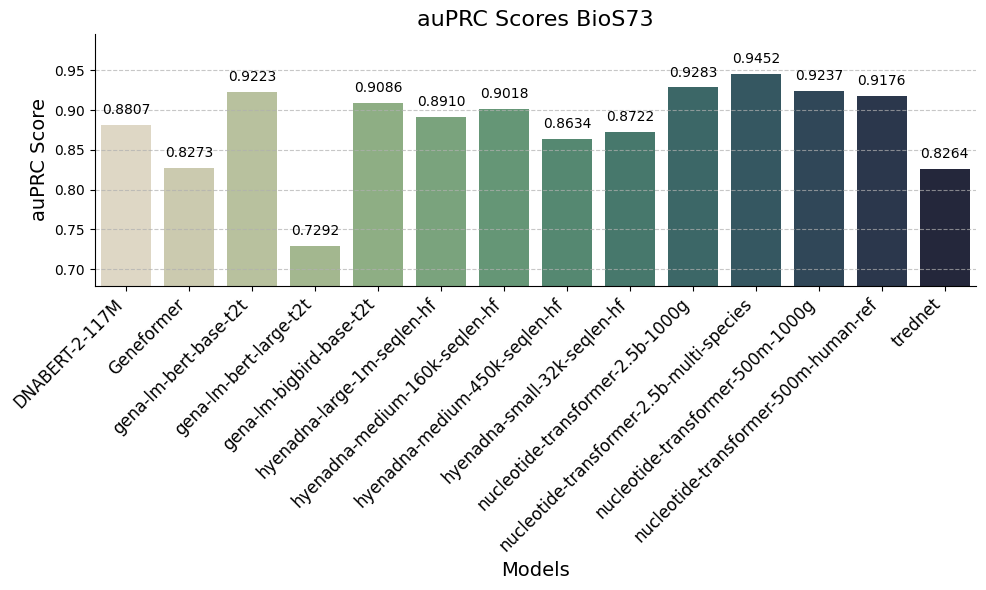

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Data
prc_scores = [*prc_s, prc_trednet]
models = [*models_names, 'trednet']  # Names of the models

# Create the plot

# Create a color gradient based on the values
color_palette = sns.color_palette("ch:s=.25,rot=-.75", len(prc_scores))
color_palette = [(r, g, b, 0.8) for r, g, b in color_palette]

# Create the plot
plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=prc_scores, palette=color_palette)


# Add title and labels with appropriate font size
plt.title(f'auPRC Scores {bios_id}', fontsize=16)
plt.xlabel('Models', fontsize=14)
plt.ylabel('auPRC Score', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)

# Set y-axis limits for more precision
plt.ylim(min(prc_scores) - 0.05, max(prc_scores) + 0.05)

# Remove top and right spines
sns.despine(right=True, top=True)

# Show grid lines for better visualization
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add data labels above each bar
for i, v in enumerate(prc_scores):
    plt.text(i, v + 0.01, f'{v:.4f}', ha='center', va='bottom', fontsize=10)

# Show plot
plt.tight_layout()
plt.show()


/data/Dcode/gaetano/venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


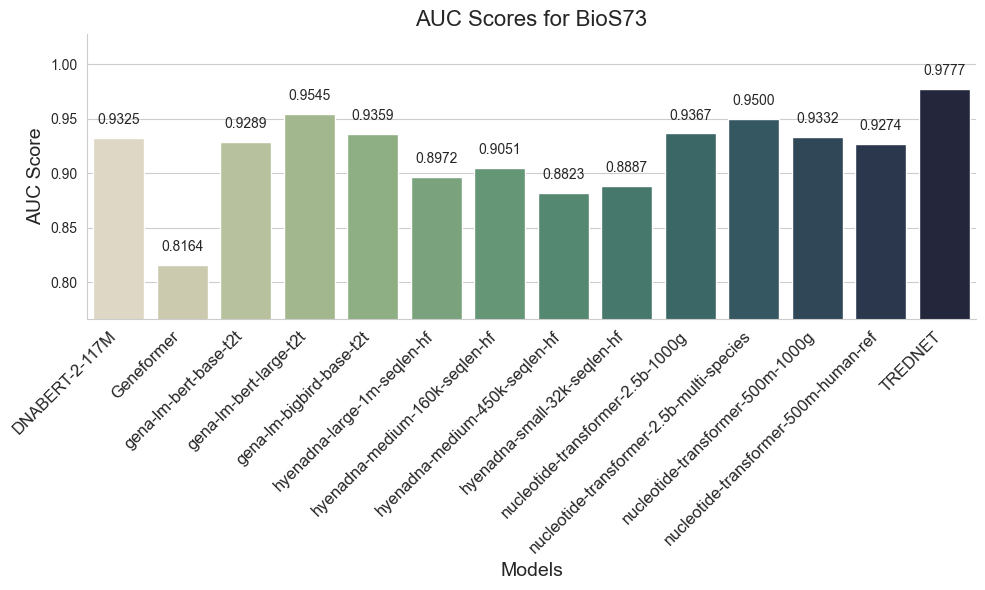

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Data
auc_scores = [*auc_s, auc_trednet]
models = [*models_names, 'TREDNET']  # Updated model names

# Set the style
sns.set_style("whitegrid")

# Create a color gradient based on the values
color_palette = sns.color_palette("ch:s=.25,rot=-.75", len(prc_scores))
color_palette = [(r, g, b, 0.8) for r, g, b in color_palette]

# Create the plot
plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=auc_scores, palette=color_palette)

# Add title and labels
plt.title(f'AUC Scores for {bios_id}', fontsize=16)
plt.xlabel('Models', fontsize=14)
plt.ylabel('AUC Score', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)

# Set y-axis limits for more precision
plt.ylim(min(auc_scores) - 0.05, max(auc_scores) + 0.05)

# Remove top and right spines
sns.despine(right=True, top=True)

# Add data labels above each bar
for i, v in enumerate(auc_scores):
    plt.text(i, v + 0.01, f'{v:.4f}', ha='center', va='bottom', fontsize=10)

# Show plot
plt.tight_layout()
plt.show()


## ROC Values

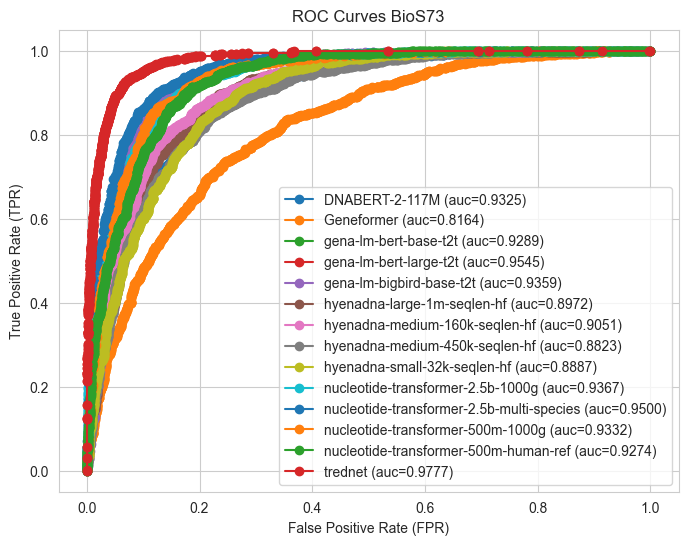

In [8]:
# Create an empty dictionary to store DataFrames
df_s = []

for model_name in models_names:
    file_path = os.path.join(os.getcwd(), model_name, bios_id) 
    # Read the file into a pandas DataFrame
    df = pd.read_csv(os.path.join(file_path, "roc_values.txt"), delimiter='\t')
    # Store the DataFrame in the dictionary with the model_name as key
    df_s.append(df)


# Read the file into a pandas DataFrame
df = pd.read_csv(os.path.join(path_trednet,bios_id, "roc_values.txt"), delimiter='\t')
# Store the DataFrame in the dictionary with the model_name as key
df_s.append(df)

# Plot FPR and TPR columns from all DataFrames
plt.figure(figsize=(8, 6))

for df, model_name, auc_s in zip(df_s,[*models_names, 'trednet'],auc_scores):
    plt.plot(df['FPR'], df['TPR'], marker='o', linestyle='-', label=f"{model_name} (auc={auc_s:.4f})")  

plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title(f'ROC Curves {bios_id}')
plt.legend()
plt.grid(True)
plt.show()

## Differenc Cell Lines

DNABERT-2-117M
Geneformer
gena-lm-bert-base-t2t
gena-lm-bert-large-t2t
gena-lm-bigbird-base-t2t
hyenadna-large-1m-seqlen-hf
hyenadna-medium-160k-seqlen-hf
hyenadna-medium-450k-seqlen-hf
hyenadna-small-32k-seqlen-hf
nucleotide-transformer-2.5b-1000g
nucleotide-transformer-2.5b-multi-species
nucleotide-transformer-500m-1000g
nucleotide-transformer-500m-human-ref


IndexError: list index out of range

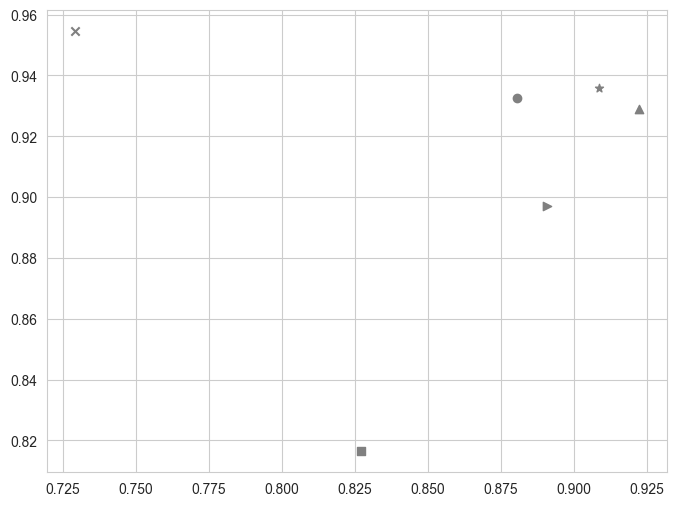

In [9]:
import matplotlib.pyplot as plt

# Define bios_ids and corresponding marker lists
bios_ids = ['BioS73']
bios_id_colors = {b:c for b,c in zip(bios_ids, ['blue'])}
bios_id_markers = {b: ['o', 's', '^','x','*','>'] for b in bios_ids}   # Example marker lists, customize as needed

# Create scatter plot
plt.figure(figsize=(8, 6))

flag = 1
for bios_id in bios_ids:
    prcs, aucs = get_prcs_aucs(models_names, bios_id)
    t_prc, t_auc = get_prcs_aucs_trednet(bios_id)

    x = [*prcs, t_prc]
    y = [*aucs, t_auc]

    markers = bios_id_markers[bios_id]  # Get markers for current bios_id
    if flag:
        for i in range(len(x)):
            plt.scatter(x[i], y[i], color='gray', marker=markers[i], label = [*models_names,'trednet'][i])
        flag = 0

    plt.scatter(x[0], y[0], color=bios_id_colors[bios_id],  marker='.', label=bios_id)

    for i, model in enumerate([*models_names,'trednet']):
        plt.scatter(x[i], y[i], color=bios_id_colors[bios_id], marker=markers[i])

plt.xlabel('PRC')
plt.ylabel('AUC')
plt.title('PRC vs AUC')
# Place legend at the bottom outside the plot
plt.legend(bbox_to_anchor=(0.5, -0.3), loc='lower center', ncol=3)
plt.grid(True)
plt.show()
